# Aprendizaje Automático
## Práctica 1: Introducción - Recta

Esta es una práctica de introducción a la asignatura en la que implementaremos un programa sencillo para hacer una regresión entre dos puntos y luego lo extenderemos para realizar la misma regresión sobre una nube de puntos. Como resultado, podremos comprender mejor la necesidad de los modelos de regresión lineal que veremos en el siguiente tema.

### Índice de la práctica

- [Parte 1:Regresión univariable con dos puntos (interpolación)](#parte1)
- [Parte 2:Regresión univariable con múltiples puntos](#parte2)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Helper function to test the correctness of the solutions
def test_nb(var, val, msg=""):
    if var == val:
        print("✔️ Test passed.")
    else:
        print("❌ Test failed. " + msg)
        raise AssertionError(msg)


%matplotlib inline

## Parte 1: Regresión univariable con dos puntos (interpolación) <a id="parte1"></a>
Escribe un programa en Python que a partir de dos puntos calcule los parámetros $a$ y $b$ que definen la recta que pasa por dichos puntos. Puedes ver un ejemplo de lo que buscamos en la siguiente figura.

![Ejemplo recta](recta.png "Ejemplo recta")

Para realizar esta tarea puedes seguir los siguientes pasos:
1. Crea una función `aprende_recta` que tenga como parámetro de entrada el array generado y "aprenda" (calcule) los parámetros de la recta que une los dos puntos. La función devolverá estos parámetros.
	* La ecuación de la recta es $y = a\cdot x+b$
	* $a$ se calcula como $a=(y_2-y_1)/(x_2-x_1 )$
	* $b$ se calcula como $b= y_1-m\cdot x_1$
2. Crea una función `valora_punto` que reciba como parámetros de entrada los parámetros de la recta ($a$ y $b$) y un valor del eje $x$, y devuelva el valor del eje $y$ de dicho punto.
3. Comprueba que las funciones están correctamente implementadas haciendo uso de los tests.

In [2]:
# Función que aprende de los dos ejemplos de entrenamiento
def aprende_recta(puntos):
    (x1,y1),(x2,y2) = puntos
    a = (y2-y1)/(x2-x1)
    b = y1 - a * x1
    return a, b


# Funcion que evalua ejemplos (valor en x) en la recta aprendida
def valora_punto(a, b, x):
    y = a * x + b
    return y

In [3]:
# Comprobamos si aprende_recta es correcta
test_nb(aprende_recta(np.array([[1, 1], [2, 2]])),(1.0, 0.0))
test_nb(aprende_recta(np.array([[-4, 10], [-5, 6]])),(4.0, 26.0))

✔️ Test passed.
✔️ Test passed.


In [4]:
# Comprobamos si valora_punto es correcta
test_nb(valora_punto(0.5, 2, 0.4),2.2)
test_nb(valora_punto(-0.6, -2.2, 3.2),-4.12)

✔️ Test passed.
✔️ Test passed.


Ahora, sigue los siguientes pasos para crear el programa principal:
1. Crea un array de puntos con los siguientes ejemplos: $(1,1)$ y $(2,2)$.
2. Aprende la recta en base a ellos.
3. Visualiza la recta obtenida junto con los dos puntos. Para ello,
    * 3.1. Obtén el valor del eje $y$ de todos los puntos comprendidos entre $0$ y $10$ (con incrementos de $1$ en $1$) con la recta aprendida. Puede almacenar estos resultados en una lista.
    * 3.2. Muestra la recta obtenida utilizando la lista anterior y los puntos evaluados (de $0$ a $10$).
    * 3.3. Muestra gráficamente los puntos generados inicialmente (en la misma gráfica, scatter del array inicial en otro color)


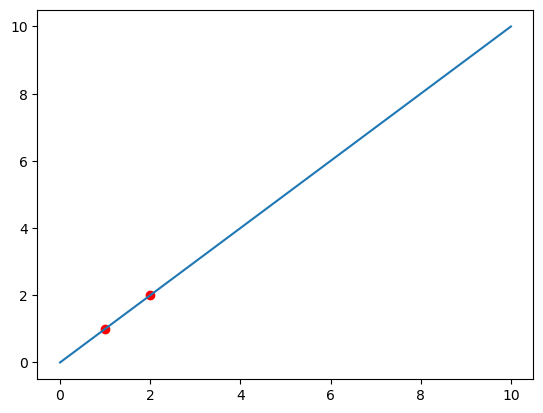

In [ ]:
# Crear el array con los dos ejemplos de entrenamiento
puntos = np.array([[1, 1], [2, 2]])


a, b = aprende_recta(puntos)

xs = np.arange(0, 11, 1)
ys = valora_punto(a, b, xs)

plt.plot(xs, ys, label='Recta aprendida')
plt.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Puntos')
plt.show()

## Parte 2: Regresión univariable con múltiples puntos <a id="parte2"></a>
Escribe un programa en Python que a partir de un cojunto de puntos calcule los parámetros $a$ y $b$ que definen una recta que se ajuste a la nube de puntos. Para simplificarlo, lo que haremos será escoger dos puntos aleatorios y utilizar estos para obtener una recta que pase por los mismos, asumiendo que esto permitirá obtener una recta que se ajusta también al resto (lo cual no tiene por qué ocurrir). Puedes ver un ejemplo de lo que buscamos en la siguiente figura.

![Ejemplo rectas](rectas.png "Ejemplo rectas")

Para realizar esta tarea puedes seguir los siguientes pasos:
1. Modificar la función `aprende_recta` que aprende los parámetros de la recta de tal manera que se escojan dos puntos aleatoriamente de los puntos de entrada (que contendrá un punto por fila). Los puntos escogidos deben ser diferentes, para ello, puedes hacer uso la función [`numpy.random.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) para generar una permutación de tantos elementos como ejemplos se reciban, y coger los dos primeros valores de esa permutación como índices de los ejemplos sobre los que se va a aprender la recta. El resto de la función permanece igual.
2. Implementa la función que evalúa nuevos puntos `valora_punto` de forma vectorizada para que sea capaz de evaluar más de un puntos a la vez sin utilizar bucles.
4. Comprueba que las funciones están correctamente implementadas haciendo uso de los tests.

In [5]:
# Función que aprende de los dos ejemplos de entrenamiento
def aprende_recta(puntos):
    puntosx = np.random.permutation(len(puntos))[:2]
    (x1, y1), (x2, y2) = puntos[puntosx]
    
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1
    return a, b


# Funcion que evalua ejemplos (valor en x) en la recta aprendida de forma vectorizada (x puede ser un array)
def valora_punto(a, b, x):
    y = a * x + b
    return y

In [6]:
# Comprobamos si aprende_recta es correcta
np.random.seed(37)
test_nb(aprende_recta(np.array([[1, 1], [2, 2], [4, 2]])),(-0.0, 2.0))
test_nb(aprende_recta(np.array([[-4, 10], [-2, 6], [2, 3]])),(-0.75, 4.5))

✔️ Test passed.
✔️ Test passed.


In [7]:
# Comprobamos si valora_punto es correcta
test_nb(valora_punto(0.5, 2, 0.4),2.2)
test_nb(valora_punto(-0.6, -2.2, 3.2),-4.12)
test_nb(np.all(np.round(valora_punto(np.array([0.5, -0.6]), -2.2, 3.2),2) == np.array([-0.6 , -4.12])),True)

✔️ Test passed.
✔️ Test passed.
✔️ Test passed.


Ahora, sigue los siguientes pasos para crear el programa principal:

1. Asigna un valor para la semilla de generación de números aleatorios de tal forma que aseguremos la reproducibilidad en las siguientes ejecuciones (`np.random.seed`). Utiliza la semilla 90.
2. Crea un array de $10$ ejemplos, con dos columnas y $10$ filas. La primera columna ($x$) debe tener los números entre $1$ y $10$. La segunda columna ($y$) la generaremos con un array de números aleatorios entre $0$ y $10$ (utilizando `np.random.rand`).
3. Llama a la función que aprende la recta `aprende_recta` con los ejemplos generados.
4. Visualiza el resultado. Para ello,
    * 4.1. Obtén el valor del eje $Y$ de todos los puntos comprendidos entre $0$ y $10$ (con incrementos de $1$ en $1$) con la recta aprendida. Utiliza para ello la función `valora_punto`.  Puedes almacena estos resultados en una lista.
    * 4.2. Muestra la recta obtenida utilizando la lista anterior y los puntos evaluados (de $0$ a $10$).
    * 4.3. Muestra gráficamente los puntos generados inicialmente (`scatter` del array inicial, en la misma gráfica y en otro color).

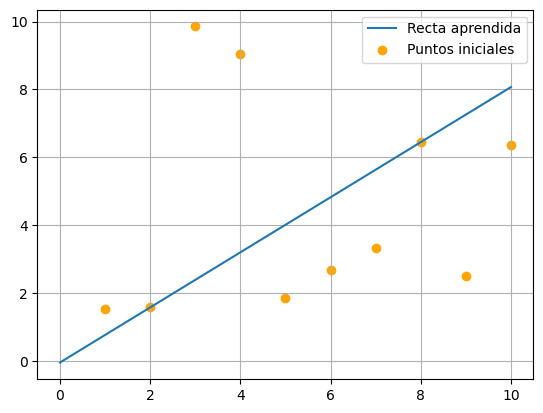

In [ ]:
# Programa principal
np.random.seed(90)

# generar 10 puntos: x = 1..10, y aleatorio en [0,10)
x = np.arange(1, 11)
y = np.random.rand(10) * 10
puntos = np.column_stack((x, y))

a, b = aprende_recta(puntos)

# mostrar la recta aprendida
xs = np.arange(0, 11, 1)
ys = valora_punto(a, b, xs)

plt.figure() #crea una "nueva ventana"
plt.plot(xs, ys, label='Recta aprendida')
plt.scatter(puntos[:,0], puntos[:, 1], color='orange', label='Puntos iniciales')
plt.legend()
plt.grid(True)
plt.show()

¿Qué pasaría si se hubieran escogido otros puntos? Puedes probar a mostrar toda la combinación de puntos y ver las rectas que obtendrías.

Total de combinaciones: 45


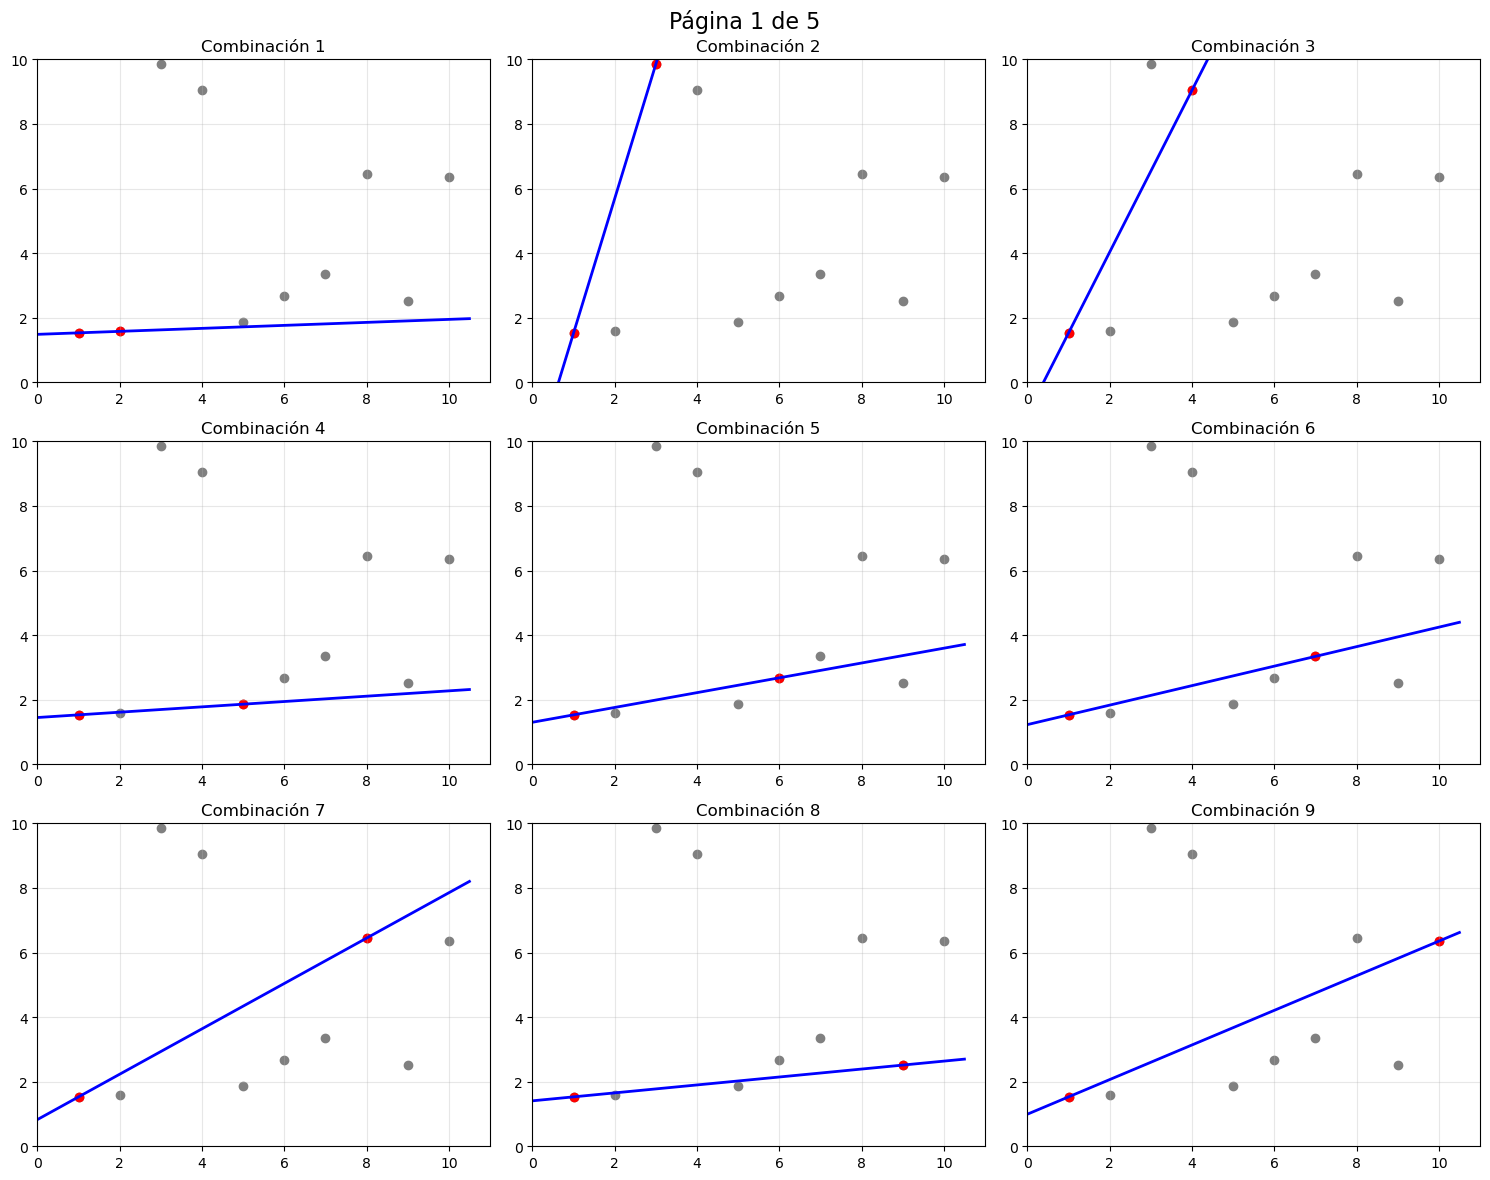

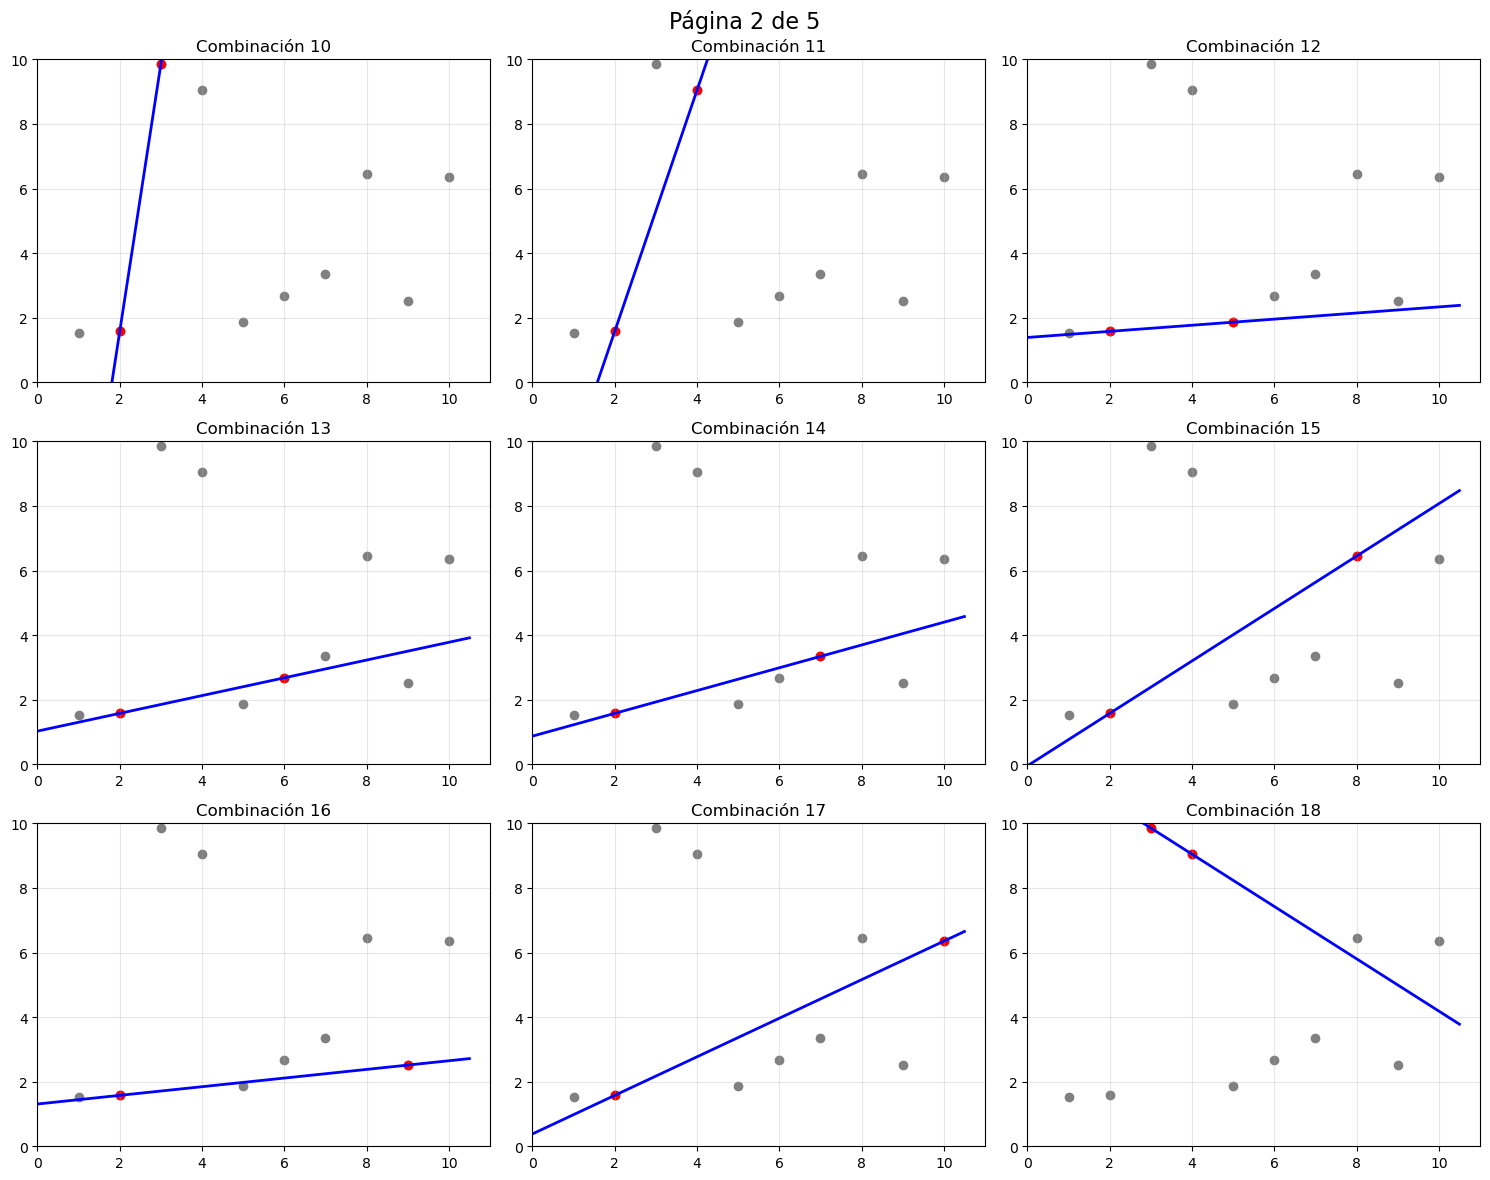

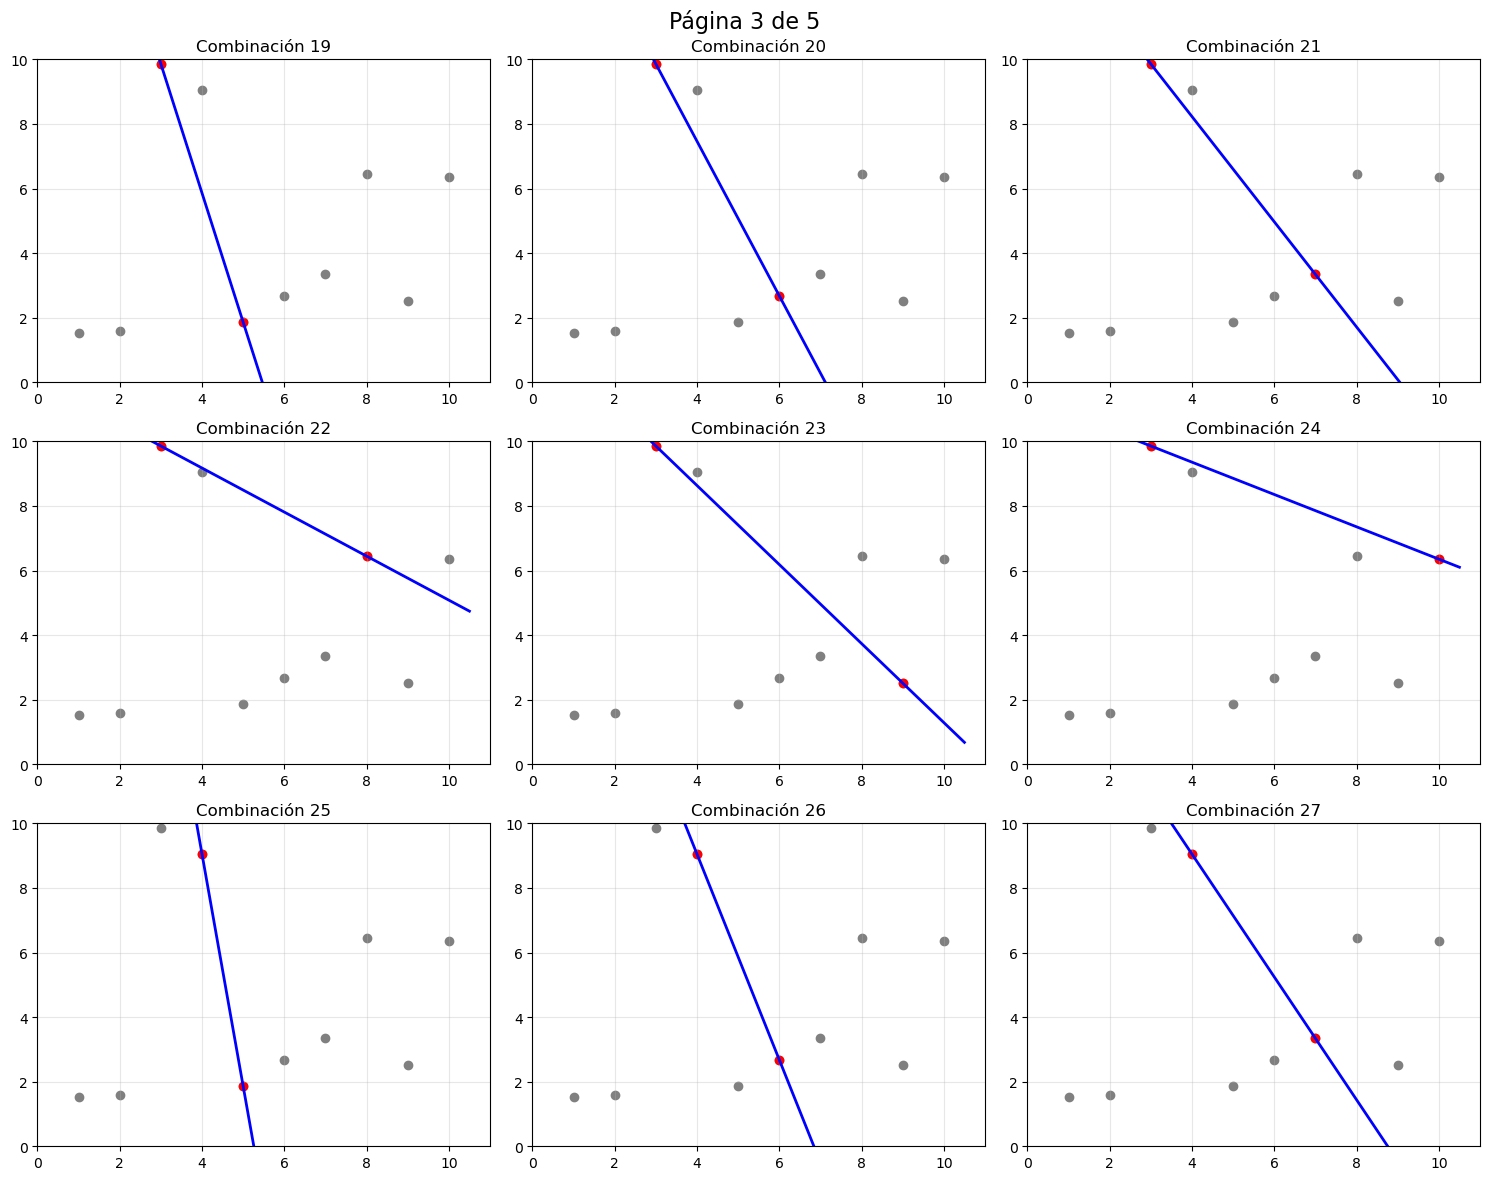

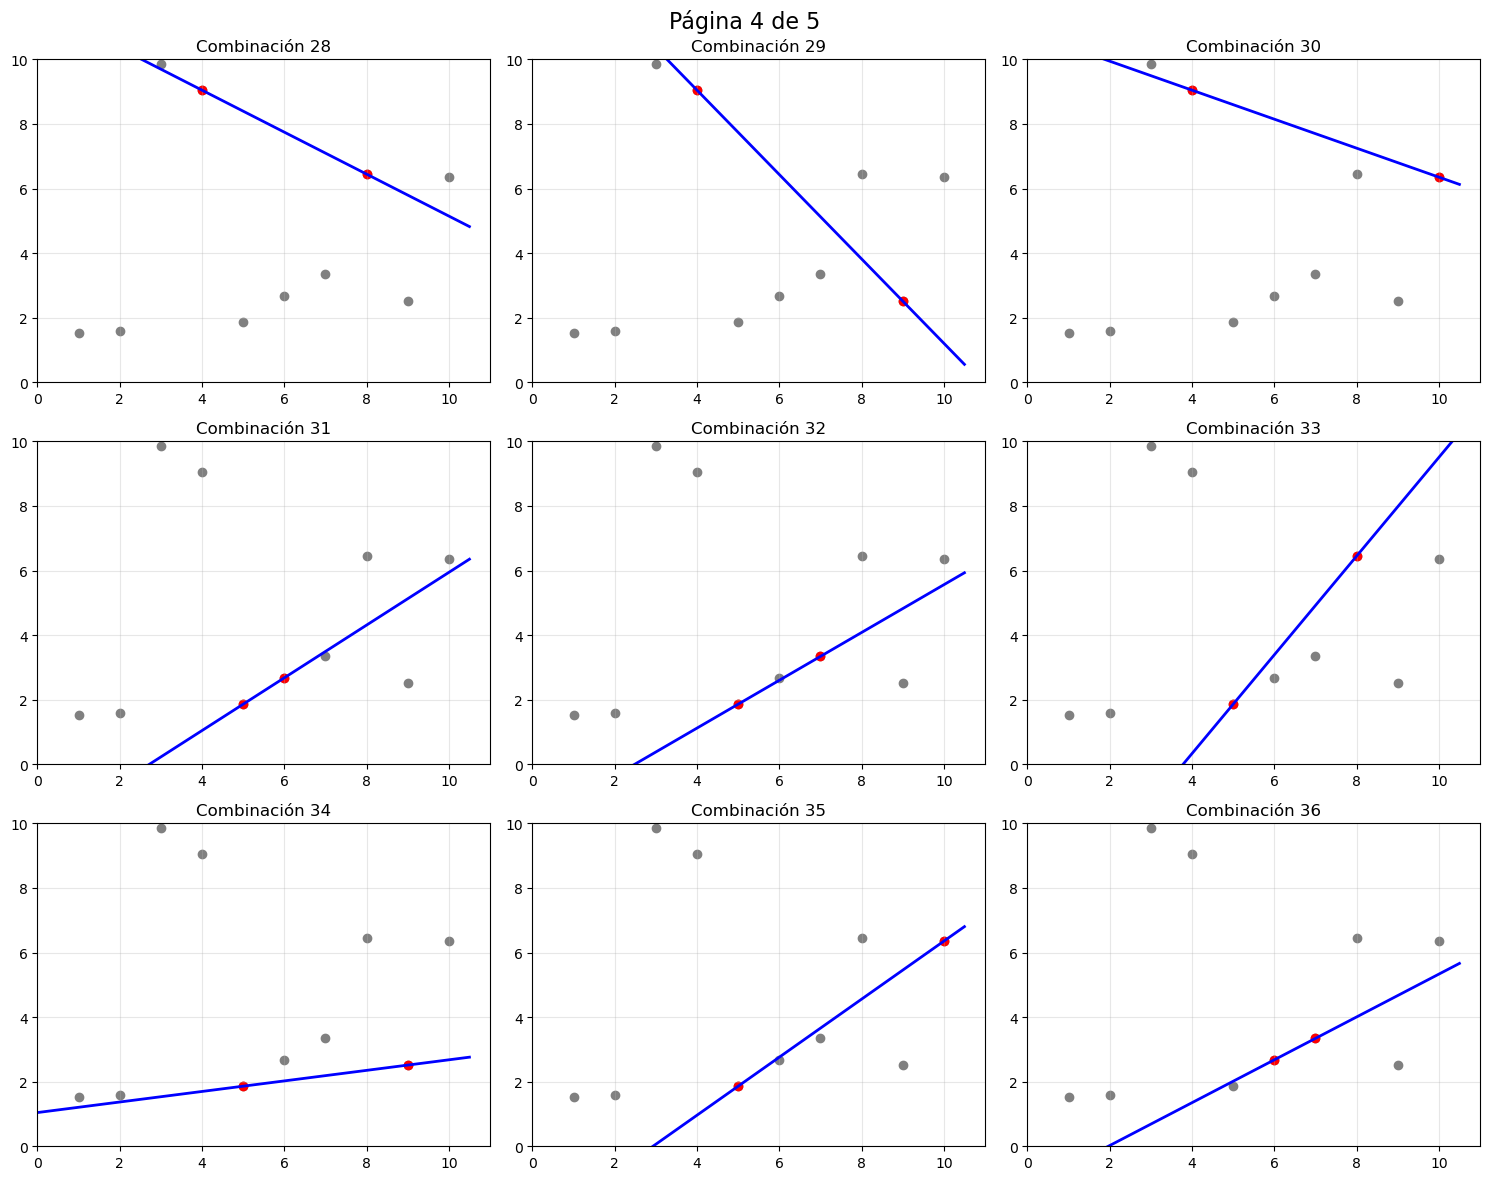

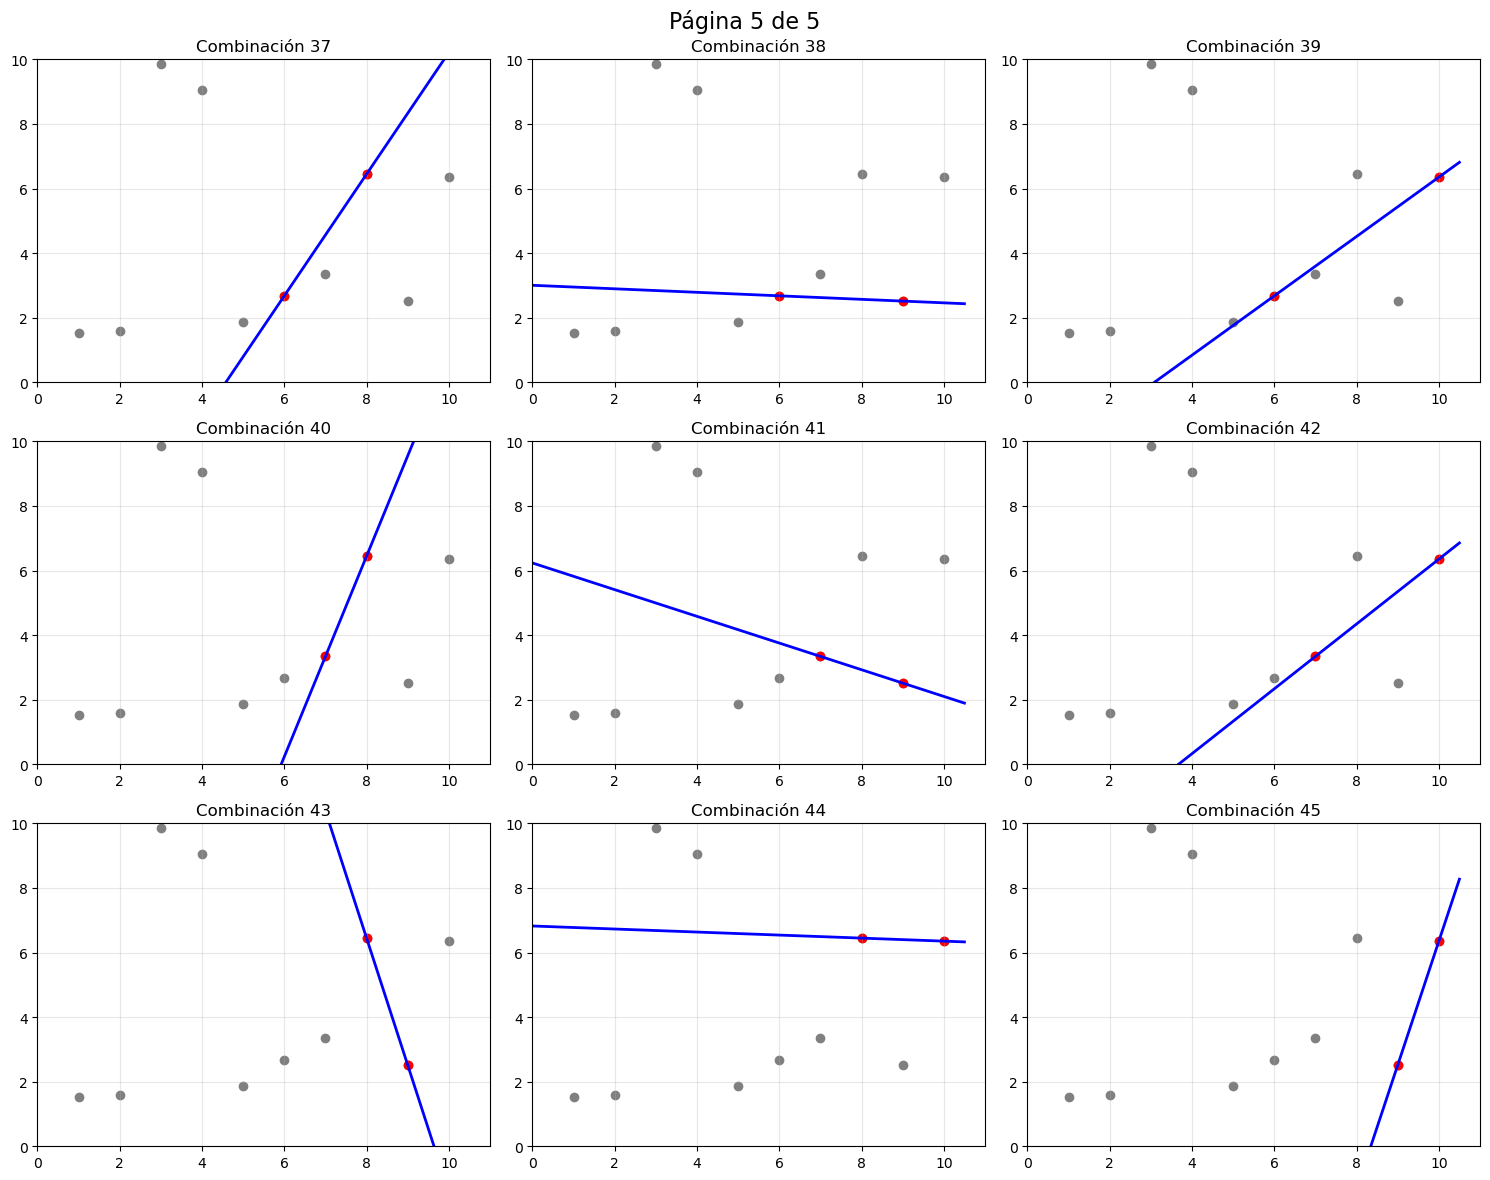

In [ ]:
import itertools

np.random.seed(90)

# generar los mismos 10 puntos
x = np.arange(1, 11)
y = np.random.rand(10) * 10
puntos = np.column_stack((x, y))

# todas las combinaciones
combinaciones = list(itertools.combinations(range(len(puntos)), 2))

combinaciones_por_pagina = 9
total_paginas = (len(combinaciones) + combinaciones_por_pagina - 1) // combinaciones_por_pagina

print(f"Total de combinaciones: {len(combinaciones)}")


# Mostrar cada página
for pagina in range(total_paginas):
    inicio = pagina * combinaciones_por_pagina
    fin = min(inicio + combinaciones_por_pagina, len(combinaciones))
    combinaciones_pagina = combinaciones[inicio:fin]
    
    # Crear figura para esta página
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten() #convierte la matriz 2D a 1D
    
    for i, (pt1, pt2) in enumerate(combinaciones_pagina):
        punto1, punto2 = puntos[pt1], puntos[pt2]
        a, b = aprende_recta(np.array([punto1, punto2]))
        
        # creamos la recta
        xs = np.arange(0, 11, 0.5)
        ys = valora_punto(a, b, xs)
        
        # dibujar en el subplot
        axes[i].plot(xs, ys, 'b-', linewidth=2)
        axes[i].scatter(puntos[:, 0], puntos[:, 1], color='gray')
        axes[i].scatter([punto1[0], punto2[0]], [punto1[1], punto2[1]], color='red')
        axes[i].set_title(f'Combinación {inicio+i+1}')
        axes[i].set_xlim(0, 11)
        axes[i].set_ylim(0, 10)
        axes[i].grid(True, alpha=0.3)
    
   
    
    plt.suptitle(f'Página {pagina + 1} de {total_paginas}', fontsize=16)
    plt.tight_layout()
    plt.show()
